In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_excel('p1-customers.xlsx')

In [7]:
df = df.join(pd.get_dummies(df['Customer_Segment']))

In [9]:
customer_segment_map = dict()
i = 1
for entry in pd.unique(df['Customer_Segment']):
    customer_segment_map[i] = entry
    i += 1
print customer_segment_map

customer_segment_map[1] = 'Store Mailing List'
customer_segment_map[2] = 'Loyalty Club Only'
customer_segment_map[3] = 'Credit Card Only'
customer_segment_map[4] = 'Loyalty Club and Credit Card'

print customer_segment_map

{1: u'Store Mailing List', 2: u'Loyalty Club and Credit Card', 3: u'Loyalty Club Only', 4: u'Credit Card Only'}
{1: 'Store Mailing List', 2: 'Loyalty Club Only', 3: 'Credit Card Only', 4: 'Loyalty Club and Credit Card'}


In [10]:
# Replace Customer_Segment with mapped number
# df['Customer_Segment'] = df['Customer_Segment'].apply(lambda x: customer_segment_map.keys()[customer_segment_map.values().index(x)])
df['Responded_to_Last_Catalog'] = df['Responded_to_Last_Catalog'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,0,1,6,0,0,0,1
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,1,1,6,0,0,0,1
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,0,1,3,0,0,0,1
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,1,1,6,0,0,0,1
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,1,1,2,0,0,0,1


In [26]:
feature_names = ['Credit Card Only', 
               'Loyalty Club Only',
               'Loyalty Club and Credit Card',
               'Avg_Num_Products_Purchased', 
               '#_Years_as_Customer', 
               'Responded_to_Last_Catalog']
features = df[feature_names]
labels = df['Avg_Sale_Amount']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [28]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = reg.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
print r2_score(y_test, y_pred)

0.830400384709


In [31]:
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.83040038470863442

('Coefficients: \n', array([ 242.14922879,   88.42774868,  528.38848785,   69.10466695,
         -1.63527846,  -28.92128404]))
Mean squared error: 17168.66
Variance score: 0.83


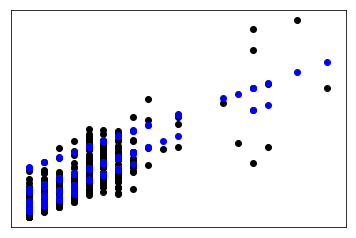

In [33]:
# Print and plot results
import matplotlib.pyplot as plt
%matplotlib inline

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test['Avg_Num_Products_Purchased'], y_test,  color='black')
plt.scatter(X_test['Avg_Num_Products_Purchased'], reg.predict(X_test), color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [34]:
df_mailing_list = pd.read_excel('p1-mailinglist.xlsx')
df_mailing_list = df_mailing_list.join(pd.get_dummies(df_mailing_list['Customer_Segment']))
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0


In [35]:
feature_names = ['Credit Card Only', 
               'Loyalty Club Only',
               'Loyalty Club and Credit Card',
               'Avg_Num_Products_Purchased', 
               '#_Years_as_Customer', 
               'Score_Yes']

In [36]:
df_mailing_list['Predicted_Average_Sale_Amount'] = reg.predict(df_mailing_list[feature_names])

In [37]:
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List,Predicted_Average_Sale_Amount
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,350.371439
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,992.142294
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,617.725433
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,280.609710
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,416.594598


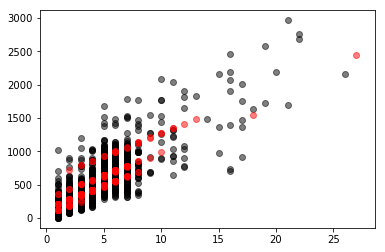

In [38]:
plt.figure()
plt.scatter(df['Avg_Num_Products_Purchased'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['Avg_Num_Products_Purchased'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

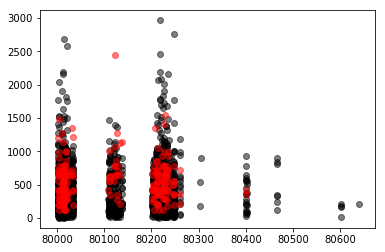

In [39]:
plt.figure()
plt.scatter(df['ZIP'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['ZIP'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

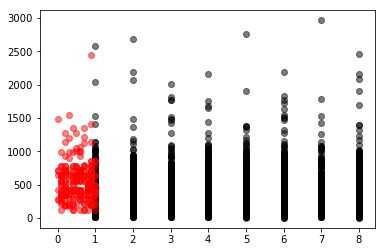

In [40]:
plt.figure()
plt.scatter(df['#_Years_as_Customer'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['#_Years_as_Customer'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

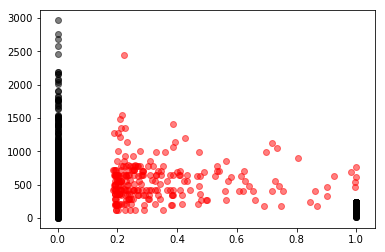

In [41]:
plt.figure()
plt.scatter(df['Responded_to_Last_Catalog'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['Score_Yes'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

In [42]:
df_mailing_list['Predicted_Revenue'] = df_mailing_list['Predicted_Average_Sale_Amount']*df_mailing_list['Score_Yes']

In [43]:
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List,Predicted_Average_Sale_Amount,Predicted_Revenue
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,350.371439,106.875835
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,992.142294,469.010007
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,617.725433,357.590041
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,280.609710,85.624633
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,416.594598,161.516165


In [44]:
print "Total Predicted Revenue: ${:0.2f}".format(np.sum(df_mailing_list['Predicted_Revenue']))

Total Predicted Revenue: $46996.01
